# Shubh Sinha - 210968172

### Week 04 Exercise 02

### Horse Zebra Image Dataset

In [9]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input
from tensorflow.keras.optimizers import Adam
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
import os
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Dropout

In [10]:
import os
# import zipfile

# local_zip = '/home/mca/Desktop/cats_dogs_filtered.zip'
# zip_ref = zipfile.ZipFile(local_zip, 'r')
# zip_ref.extractall('/home/mca/Desktop')
# zip_ref.close()

In [11]:
from IPython.testing import test
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
base_dir = '/home/mca/Desktop/horse_zebra'
train_dir = os.path.join(base_dir, 'train')
test_dir= os.path.join(base_dir,'test')
validation_dir = os.path.join(base_dir, 'validation')
train_horse_dir = os.path.join(train_dir, 'horse')
train_zebra_dir = os.path.join(train_dir, 'zebra')
validation_horse_dir = os.path.join(validation_dir, 'horse')
validation_zebra_dir = os.path.join(validation_dir, 'zebra')
test_horse_dir = os.path.join(test_dir, 'horse')
test_zebra_dir = os.path.join(test_dir, 'zebra')

In [12]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  
        target_size=(224, 224),  
        batch_size=20,
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(224, 224),
        batch_size=20,
        class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
  validation_dir,
  target_size=(224, 224),
  batch_size=20,
  class_mode='categorical')


Found 2401 images belonging to 2 classes.
Found 260 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [13]:
train_horse_fnames = os.listdir(train_horse_dir)
print(train_horse_fnames[:10])

train_zebra_fnames = os.listdir(train_zebra_dir)
train_zebra_fnames.sort()
print(train_zebra_fnames[:10])



['n02381460_1793.jpg', 'n02381460_2061.jpg', 'n02381460_4542.jpg', 'n02381460_3707.jpg', 'n02381460_1227.jpg', 'n02381460_2269.jpg', 'n02381460_1384.jpg', 'n02381460_1486.jpg', 'n02381460_4639.jpg', 'n02381460_4695.jpg']
['n02391049_10007.jpg', 'n02391049_10027.jpg', 'n02391049_1004.jpg', 'n02391049_10047.jpg', 'n02391049_10063.jpg', 'n02391049_101.jpg', 'n02391049_1012.jpg', 'n02391049_10122.jpg', 'n02391049_10123.jpg', 'n02391049_10129.jpg']


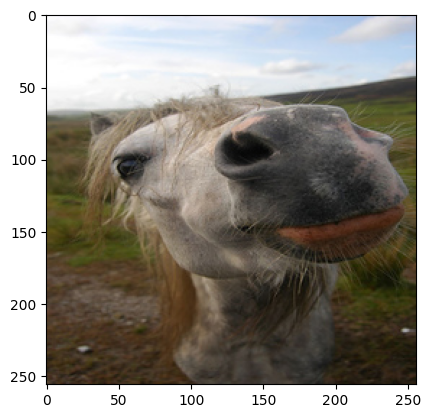

In [14]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.imshow(mpimg.imread(os.path.join(train_horse_dir, train_horse_fnames[0])))

In [15]:
im = mpimg.imread(os.path.join(train_horse_dir, train_horse_fnames[0]))

In [17]:
def LeNet5():
    model = tf.keras.Sequential([
        Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(224, 224, 3)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(16, kernel_size=(5, 5), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(120, activation='relu'),
        Dense(84, activation='relu'),
        Dense(2, activation='softmax')
    ])
    return model
model = LeNet5()
model.compile(optimizer=Adam(learning_rate=0.000001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

history=model.fit(train_generator,validation_data=validation_generator, epochs=30)
model.evaluate(test_generator, batch_size=32)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 220, 220, 6)       456       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 110, 110, 6)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 106, 106, 16)      2416      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 53, 53, 16)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 44944)             0         
                                                                 
 dense_6 (Dense)             (None, 120)              

[0.410737007856369, 0.7846153974533081]

In [18]:
def AlexNet():
    model = tf.keras.Sequential([
        Conv2D(96, (11, 11), strides=(4, 4), activation='relu', input_shape=(224, 224, 3)),
        MaxPooling2D((3, 3), strides=(2, 2)),
        Conv2D(256, (5, 5), padding='same', activation='relu'),
        MaxPooling2D((3, 3), strides=(2, 2)),
        Conv2D(384, (3, 3), padding='same', activation='relu'),
        Conv2D(384, (3, 3), padding='same', activation='relu'),
        Conv2D(256, (3, 3), padding='same', activation='relu'),
        MaxPooling2D((3, 3), strides=(2, 2)),
        Flatten(),
        Dense(4096, activation='relu'),
        Dense(4096, activation='relu'),
        Dense(2, activation='softmax')
    ])
    return model

model = AlexNet()
model.compile(optimizer=Adam(learning_rate=0.000001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
history=model.fit(train_generator, validation_data=validation_generator, epochs=30)
model.evaluate(test_generator, batch_size=32)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 54, 54, 96)        34944     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 26, 26, 96)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 26, 26, 256)       614656    
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 12, 12, 256)      0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 12, 12, 384)       885120    
                                                                 
 conv2d_9 (Conv2D)           (None, 12, 12, 384)      

[0.24418988823890686, 0.8961538672447205]

In [19]:
from keras.applications.vgg16 import VGG16
base_model = VGG16(input_shape=(224,224,3), weights='imagenet', include_top=False)
base_model.trainable = False #freeze the layers

model=Sequential([
    base_model,
    Flatten(),
    Dense(2, activation='softmax'),
])
model.summary()
model.compile(optimizer=Adam(learning_rate=0.000001), loss='categorical_crossentropy', metrics=['accuracy'])
history=model.fit(train_generator, validation_data=validation_generator, epochs=30)
model.evaluate(test_generator, batch_size=32)

58889256/58889256 [==============================] - 2s 0us/step
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_4 (Flatten)         (None, 25088)             0         
                                                                 
 dense_12 (Dense)            (None, 2)                 50178     
                                                                 
Total params: 14,764,866
Trainable params: 50,178
Non-trainable params: 14,714,688
_________________________________________________________________
Epoch 1/30
121/121 [==============================] - 20s 134ms/step - loss: 0.7255 - accuracy: 0.5060 - val_loss: 0.7040 - val_accuracy: 0.5340
Epoch 2/30
121/121 [==============================] - 15s 127ms/step - loss: 0.6764 - accur

[0.2955701947212219, 0.9076923131942749]

In [20]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.models import Model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224,224,3))
base_model.trainable = False
base_model.summary()
model=Sequential([
    base_model,
    MaxPooling2D(),
    Flatten(),
    Dense(1024, activation='relu'),
    Dense(2, activation='softmax'),
    ])
model.summary()
model.compile(optimizer=Adam(learning_rate=0.000001), loss='categorical_crossentropy', metrics=['accuracy'])
history=model.fit(train_generator, validation_data=validation_generator, epochs=30)
model.evaluate(test_generator, batch_size=32)

87910968/87910968 [==============================] - 3s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_11 (Conv2D)             (None, 111, 111, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d_11[0][0]']              
 alization)           

[0.05753445625305176, 0.9884615540504456]

In [21]:
from tensorflow.keras.applications import ResNet50
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))
base_model.trainable = False
base_model.summary()
model=Sequential([
  base_model,
  MaxPooling2D(),
  Flatten(),
  Dense(1024, activation='relu'),
  Dense(2, activation='softmax'),
])
model.summary()
model.compile(optimizer=Adam(learning_rate=0.000001), loss='categorical_crossentropy', metrics=['accuracy'])
history=model.fit(train_generator, validation_data=validation_generator, epochs=30)
model.evaluate(test_generator, batch_size=32)

94765736/94765736 [==============================] - 3s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                          

[0.35300928354263306, 0.8423076868057251]

In [22]:
from tensorflow.keras.applications import EfficientNetB0
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224,224,3))
base_model.trainable = False
base_model.summary()
model=Sequential([
  base_model,
  MaxPooling2D(),
  Flatten(),
  Dense(1024, activation='relu'),
  Dense(2, activation='softmax'),
])
model.summary()
model.compile(optimizer=Adam(learning_rate=0.000001), loss='categorical_crossentropy', metrics=['accuracy'])
history=model.fit(train_generator, validation_data=validation_generator, epochs=30)
model.evaluate(test_generator, batch_size=32)

16705208/16705208 [==============================] - 1s 0us/step
Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_4[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 rescaling_1 (Rescal

[0.6324732303619385, 0.7884615659713745]

In [23]:
from tensorflow.keras.applications import MobileNetV2
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224,224,3))
base_model.trainable = False
base_model.summary()
model=Sequential([
  base_model,
  MaxPooling2D(),
  Flatten(),
  Dense(1024, activation='relu'),
  Dense(2, activation='softmax'),
])
model.summary()
model.compile(optimizer=Adam(learning_rate=0.000001), loss='categorical_crossentropy', metrics=['accuracy'])
history=model.fit(train_generator, validation_data=validation_generator, epochs=30)
model.evaluate(test_generator, batch_size=32)

9406464/9406464 [==============================] - 1s 0us/step
Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_5[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                

[0.06161439046263695, 0.9807692170143127]